# Windspeed Prediction Notebook
Raghava Pamula

In [1]:
'''
Imports
'''
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.preprocessing import MinMaxScaler

# Utility Functions

In [2]:
'''
Standard Scaling:
Scales data columns by taking each row, subtracting the column mean from it, 
and dividing it by the column standard deviation
'''
def scale(d):
    return (d-np.mean(d))/np.std(d)

'''
Returns a LSTM trainable model
'''
def initLSTM(numFeatures):

    numPoints = None

    multi_step_model = tf.keras.models.Sequential()
    multi_step_model.add(tf.keras.layers.LSTM(512, return_sequences=True, input_shape=(numPoints, numFeatures)))
    multi_step_model.add(tf.keras.layers.LSTM(256, return_sequences=True))
    multi_step_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
    multi_step_model.add(tf.keras.layers.LSTM(64, return_sequences=True))
    multi_step_model.add(tf.keras.layers.LSTM(32, activation='relu'))
    multi_step_model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.RMSprop(lr=5e-5)
    #optimizer = tf.keras.optimizers.Adam(lr=5e-5, beta_1=0.9, beta_2=0.99)

    def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

    multi_step_model.compile(optimizer=optimizer, loss = 'mse')
    return multi_step_model

'''
Trains the model on given data
'''
def train(multi_step_model, trainData, trainLabels, testData, testLabel, Title): 

    t = multi_step_model.fit(trainData, trainLabels, epochs=50, batch_size=30, validation_data=(testData, testLabels))
    plt.plot(t.history['loss'])
    plt.plot(t.history['val_loss'])
    plt.title(Title + ' train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    plt.close()

'''
Plots the predictions for the given model on the given data
'''
def plot(multi_step_model, testData, trainLabels, testLabels, Title):
    
    title = Title
    for i in range(1):
        fig = plt.figure(figsize=(12, 2)) 
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[1])

        axes = [ax0, ax1]

        x, y = testData, testLabels
        predictions = multi_step_model.predict(x, steps=1)[:,0]
        plt.figure(i)

        a = plt.gca()
        a.set_ylim([0, 7])
        
        bf = len(trainLabels)
        td = len(testData)

        axes[0].plot(range(bf), trainLabels, label='History', color='Orange')
        axes[0].plot(range(bf, bf+td), y, label='True Wspd', color='Magenta')
        axes[0].plot(range(bf, bf+td), predictions, label='Predicted Wspd', color='Navy')
        
        axes[1].plot(range(bf, bf+td), y, label='True Wspd', color='Magenta')
        axes[1].plot(range(bf, bf+td), predictions, label='Predicted Wspd', color='Navy')
        
        fig.tight_layout()
        
        # Set labels
        fig.text(0.5, 0.04, 'Time Step', ha='center', va='center')
        fig.text(0, 0.5, 'Wspd', ha='center', va='center', rotation='vertical')

        axes[0].set_title(Title + " - Training + Testing Data")
        axes[1].set_title(Title + " - Testing Data Only")

        ax0.legend(loc="upper left")
        ax1.legend(loc="upper left")
        plt.show()
        plt.close()

# Load Data

In [3]:
'''
Loads the Equal Length Mavic Data and Solo Data and the Wind Labels
The necessary files must be in the same directory as this *.ipynb file, else the program shall fail
'''

MavicData = pd.read_csv('LF-concatenated_mav.csv')[['mav_roll', 'mav_pitch', 'mav_tilt', 'mav_acc_x', 'mav_acc_y', 'mav_acc_z']]

SoloData = pd.read_csv('LF-concatenated_solo.csv')[['solo_roll', 'solo_pitch', 'solo_tilt', 'solo_acc_x', 'solo_acc_y', 'solo_acc_z']]

Wspd = pd.read_csv('LF-truncated_wind.csv')[['windspeed']]

In [4]:
'''
Convert Dataframes to numpy arrays
'''
MavicData = np.array(MavicData)
SoloData = np.array(SoloData)
Labels = np.array(Wspd)

'''
Scale each data feature
'''
for i in range(6):
    MavicData[:,i] = scale(MavicData[:,i])
    SoloData[:,i] = scale(SoloData[:,i])
    
#MavicLabels = scale(MavicLabels)
#SoloLabels = scale(SoloLabels)

# Specify datasets, train models, and plot predictions

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1776 samples, validate on 445 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
1776/1776 [==============================] - 6s 3ms/sample - loss: 10.1951 - val_loss: 12.2403
Epoch 2/50
1776/1776 [==============================] - 2s 901us/sample - loss: 10.1530 - val_loss: 12.1911
Epoch 3/50
1776/1776 [==============================] - 2s 877us/sample - loss: 10.0956 - val_loss: 12.1257
Epoch 4/50
1776/1776 [==============================] - 2s 889us/sample - loss: 10.0006 - val_loss: 12.0265
Epoch 5/50
1776/1776 [==============================] - 1s 819us/sample - loss: 9.8204 - val_loss: 11.8544
Epoch 6/50
1776/1776 [==============================] - 2s 894us/sample - loss: 9.4591 - val_loss: 11.5377
Epoch 7/50
1776/1776 [==============================] - 2s 882us/sample - loss: 8.8138 - val_loss

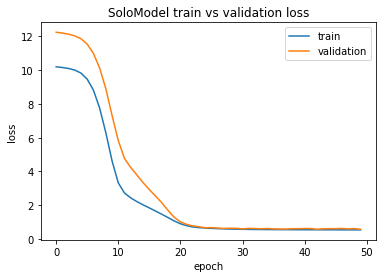

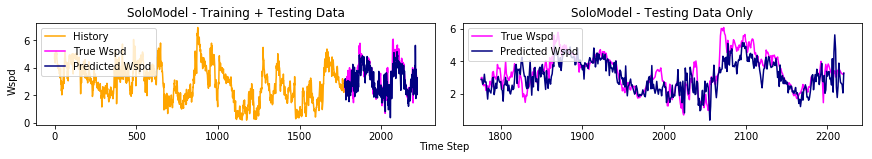

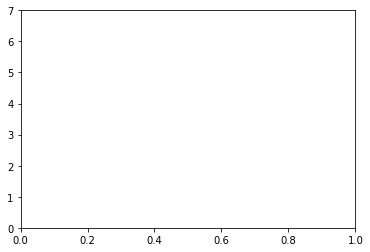

Train on 1776 samples, validate on 445 samples
Epoch 1/50
1776/1776 [==============================] - 6s 4ms/sample - loss: 10.1933 - val_loss: 12.2362
Epoch 2/50
1776/1776 [==============================] - 2s 925us/sample - loss: 10.1472 - val_loss: 12.1800
Epoch 3/50
1776/1776 [==============================] - 2s 913us/sample - loss: 10.0806 - val_loss: 12.0966
Epoch 4/50
1776/1776 [==============================] - 2s 916us/sample - loss: 9.9628 - val_loss: 11.9516
Epoch 5/50
1776/1776 [==============================] - 2s 906us/sample - loss: 9.7333 - val_loss: 11.6759
Epoch 6/50
1776/1776 [==============================] - 2s 910us/sample - loss: 9.2797 - val_loss: 11.1483
Epoch 7/50
1776/1776 [==============================] - 2s 860us/sample - loss: 8.4302 - val_loss: 10.2108
Epoch 8/50
1776/1776 [==============================] - 2s 850us/sample - loss: 7.1663 - val_loss: 8.8122
Epoch 9/50
1776/1776 [==============================] - 2s 919us/sample - loss: 5.4734 - val_loss

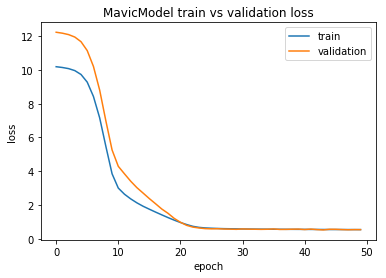

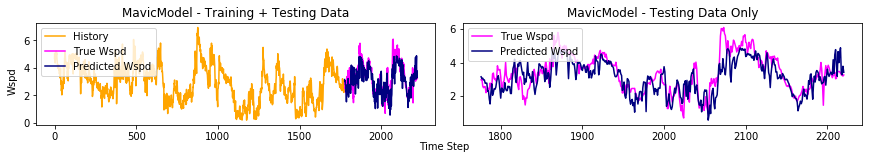

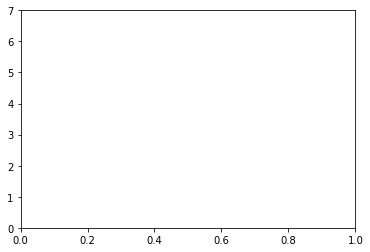

Train on 1776 samples, validate on 445 samples
Epoch 1/50
1776/1776 [==============================] - 7s 4ms/sample - loss: 10.1864 - val_loss: 12.2225
Epoch 2/50
1776/1776 [==============================] - 2s 938us/sample - loss: 10.1218 - val_loss: 12.1451
Epoch 3/50
1776/1776 [==============================] - 2s 926us/sample - loss: 10.0088 - val_loss: 12.0184
Epoch 4/50
1776/1776 [==============================] - 2s 929us/sample - loss: 9.7602 - val_loss: 11.7518
Epoch 5/50
1776/1776 [==============================] - 2s 923us/sample - loss: 9.2276 - val_loss: 11.2185
Epoch 6/50
1776/1776 [==============================] - 2s 912us/sample - loss: 8.1747 - val_loss: 10.2279
Epoch 7/50
1776/1776 [==============================] - 2s 891us/sample - loss: 6.5234 - val_loss: 8.6707
Epoch 8/50
1776/1776 [==============================] - 2s 854us/sample - loss: 4.6213 - val_loss: 6.8888
Epoch 9/50
1776/1776 [==============================] - 2s 922us/sample - loss: 3.3777 - val_loss:

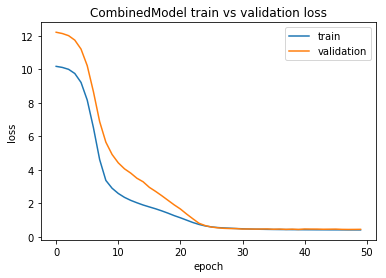

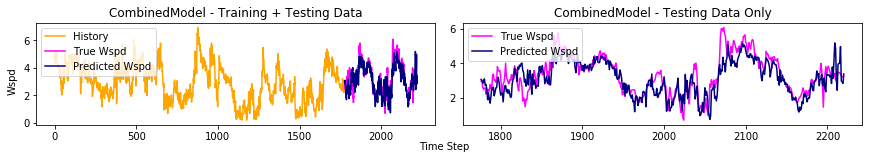

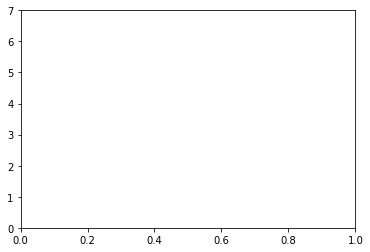

In [5]:
'''
Each element of this array is a tuple representing:
1. Input Data
2. Ground Truth
3. Name for the Model (Used for Labeling Charts)
'''
trials = [(SoloData, Labels, "SoloModel"), (MavicData, Labels, "MavicModel"), (np.hstack([SoloData, MavicData]), Labels, "CombinedModel")]

'''
For each tuple in trials, trains a model on given data and plots predictions on test data
'''
while(trials):
    Data, Labels, Title = trials.pop(0)
    idx = 4*len(Data)//5
    trainData, trainLabels = np.expand_dims(Data[:idx], 1), Labels[:idx]
    testData, testLabels = np.expand_dims(Data[idx:], 1), Labels[idx:]
    model = initLSTM(Data.shape[1])
    train(model, trainData, trainLabels, testData, testLabels, Title)
    plot(model, testData, trainLabels, testLabels, Title)

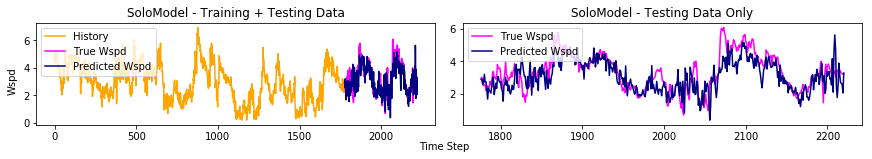
val_loss: 0.5779

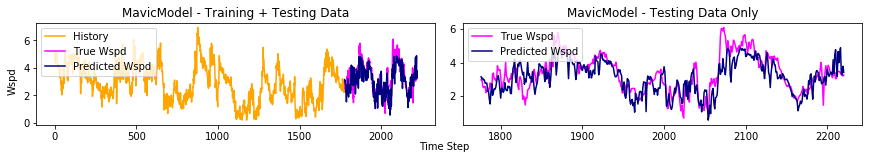
val_loss: 0.5377

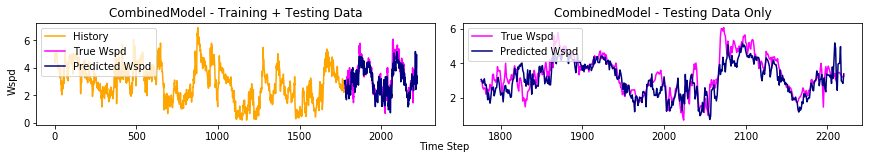
val_loss: 0.4574

# Observations

* MavicModel performed slightly better than SoloModel
* CombinedModel performed significantly better than both Mavic Model and SoloModel